In [2]:
import matplotlib
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
import numpy.ma as ma
import scipy.cluster
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [3]:
# load data
data = pd.read_csv('dataset_16_2', sep='\t', header=None)

In [4]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,df84cb4ecdf09e5ff08ccf605c93cd33,7eebdb49c85c7111eea1f3ca52fce8bc,1429627313,162,86401,25910,6,13,0,64,...,1,3,0,3,100,-,-,0,0,2
1,6ab6709af8922e1e9d9eac9d11646d1a,d5df093718f8f9b239376b1c136c75b1,1443635700,0,-,6971,8,10,-,0,...,-,-,-,-,-,-,-,-,-,2
2,e9f8a2dddd2445264d2db1b32e5c5c2b,f39c150ff0956f915d84e87d45f6c1e4,1443653041,0,-,1825,1,2,-,0,...,-,-,-,-,-,-,-,-,-,1
3,f3d2cb85a12f21887813cb3b22dbe7d0,6c2b4d3fbecd5f628db1090bba5bc537,1405667008,439,-,15,9,9,-,0,...,-,-,-,-,-,-,-,-,-,1
4,d6b99af7ab5d05b6c4277877f9d3af73,782094d9d0b65b59aa87456e788cd125,1430733562,150,86401,29562,13,21,0,17,...,-,0,0,-,-,-,-,0,-,1


In [5]:
val_to_num = {'-':np.nan, '':np.nan}

ncols = 55
for i in range(2, ncols):
    data[i] = [val_to_num[s] if s in val_to_num.keys() else float(s) for s in data[i]]

In [6]:
columns_to_drop = []

In [7]:
dataT = np.array(data)[:, 2:].astype(float).T

for i in range(ncols-2):
    for j in range(i+1, ncols-2):
        ind = (~np.isnan(dataT[i])) * (~np.isnan(dataT[j]))
        corr = np.corrcoef(dataT[i, ind], dataT[j, ind])[0, 1]
        if np.isnan(corr):
            print(i, j, ' nan')
        elif np.abs(corr) > 0.5:
            print(i, j, corr)

0 1 -0.999997941637
0 11 -0.559557400321
0 12 -0.549313552542
0 49  nan
1 11 0.558897101645
1 12 0.548665608096
1 49  nan
2 3 0.541149131779
2 8  nan
2 9 0.786467408332
2 11 0.792351006288
2 12 0.78123170086
2 13 0.637938351557
2 15 0.695133441878
2 49  nan
3 6 0.615704453835
3 15 0.501583860247
3 49  nan
4 5 0.654704878352
4 26 0.83886025372
4 49  nan
5 26 0.563501580039
5 49  nan
6 8  nan
6 22 0.659599170409
6 33 0.512564350328
6 38 0.605840237801
6 49  nan
7 17 0.716358490683
7 18 0.64878313798
7 20 0.56486254955
7 23 0.555499124676
7 31 0.837145583434
7 38 0.627850055546
7 44 0.768322706238
7 45 0.614669002083
7 46 0.81431445806
7 49  nan
7 50 0.60017370857
8 9 -0.575277067584
8 13 0.510473965137
8 17  nan
8 18  nan
8 19  nan
8 20  nan
8 21  nan
8 22  nan
8 23  nan
8 24  nan
8 25  nan
8 26  nan
8 27  nan
8 28  nan
8 29  nan
8 30  nan
8 31  nan

/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]



8 33  nan
8 34  nan
8 35  nan
8 36  nan
8 37  nan
8 38  nan
8 39  nan
8 40  nan
8 41  nan
8 42  nan
8 43  nan
8 44  nan
8 45  nan
8 46  nan
8 47  nan
8 48  nan
8 49  nan
8 50  nan
8 51  nan
9 32 -0.575374387251
9 49  nan
10 14 0.801709283246
10 49  nan
11 12 0.975337694099
11 15 0.827428585086
11 49  nan
12 15 0.864756960601
12 49  nan
13 15 0.538975044397
13 49  nan
14 49  nan
15 49  nan
16 49  nan
17 27 0.581474252685
17 31 0.89053528708
17 38 0.673521986504
17 39 0.518645005033
17 44 0.730303449461
17 45 0.773238388643
17 46 0.754656223269
17 49  nan
17 50 0.65291017958
18 20 0.870358700405
18 23 0.768729851252
18 31 0.533313689473
18 44 0.586601202665
18 46 0.547274901984
18 49  nan
19 29  nan
19 49  nan
20 23 0.716209206584
20 49  nan
21 49  nan
22 33 0.769232710645
22 49  nan
23 25 0.638675768209
23 49  nan
24 49  nan
25 49  nan
26 49  nan
27 31 0.502504416462
27 49  nan
28 49  nan
29 34  nan
29 41  nan
29 49  nan
30 49  nan
31 38 0.756792383107
31 39 0.580901661865
31 44 0.7467

In [8]:
def get_info(i, no_pic=True):
    ind = ~np.isnan(dataT[i])
    tmp = dataT[i, ind]
    print('nans_num ', len(ind) - ind.sum())
    print('min      ', tmp.min())
    print('mean     ', tmp.mean())
    print('max      ', tmp.max())
    print('norm_std ', ((tmp - tmp.min()) / (tmp.max() - tmp.min())).std())
    if len(np.unique(tmp)) < 20:
        print('Small amount of unique values: ', np.unique(tmp, return_counts=True))
    if not no_pic:
        seaborn.distplot(tmp)
        
def scatter(i, j):
    ind = (~np.isnan(dataT[i])) * (~np.isnan(dataT[j]))
    seaborn.regplot(dataT[i, ind], dataT[j, ind], fit_reg=False)

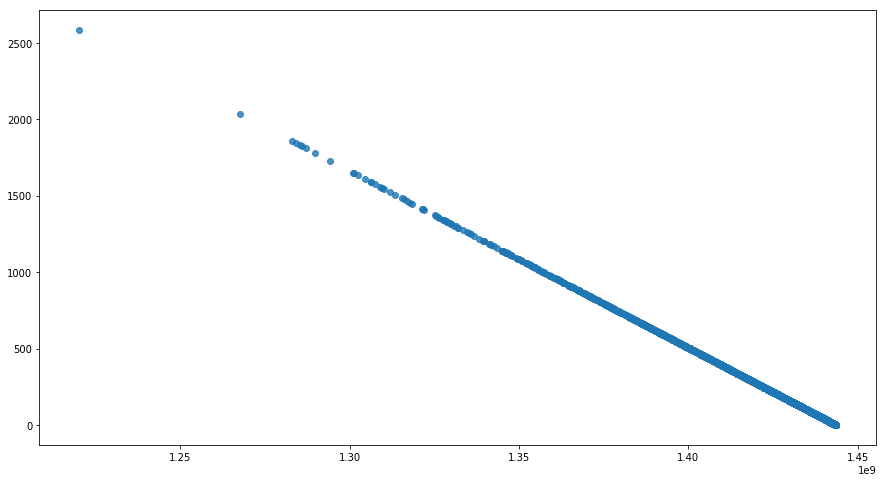

In [9]:
scatter(0, 1)

In [10]:
get_info(0)

nans_num  0
min       1220266536.0
mean      1433612087.09
max       1443733195.0
norm_std  0.086670267454


In [11]:
get_info(1)

nans_num  0
min       0.0
mean      116.350373791
max       2586.0
norm_std  0.0866328123135


In [12]:
columns_to_drop.append(0)

In [13]:
get_info(49)

nans_num  8293
min       0.0
mean      0.0
max       0.0
norm_std  nan
Small amount of unique values:  (array([ 0.]), array([803]))


/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
columns_to_drop.append(49)

In [15]:
get_info(8)

nans_num  0
min       0.0
mean      0.234938434477
max       1.0
norm_std  0.423960335978
Small amount of unique values:  (array([ 0.,  1.]), array([6959, 2137]))


In [16]:
ind1 = np.isnan(dataT[2])
ind2 = dataT[8] == 0
(ind1 == ind2).all()

True

Отсутствующие значения второго стобца однозначно определяют нули в восьмом.

In [17]:
columns_to_drop.append(8)

In [18]:
columns_to_drop

[0, 49, 8]

In [81]:
def check_if_categoric(values):
    values = values[~np.isnan(values)]
    unique_values, unique_counts = np.unique(values, return_counts=True)
    if len(unique_values) <= 10 and np.sum(unique_values[1:] - unique_values[:-1]) == len(unique_values) - 1:
        print('Unique values: ', unique_values)
        print('Counts: ', unique_counts)
        print('Possible categoric')
        return True
    else:
        print('Possibly not categoric')
        return False

In [82]:
possible_categoric_features = []

for i in range(ncols-2):
    if i in columns_to_drop:
        continue
    print('Feature: ', i)
    answer = check_if_categoric(dataT[i])
    if answer:
        possible_categoric_features.append(i)
    print()

Feature:  1
Possibly not categoric

Feature:  2
Possibly not categoric

Feature:  3
Possibly not categoric

Feature:  4
Possibly not categoric

Feature:  5
Possibly not categoric

Feature:  6
Possibly not categoric

Feature:  7
Possibly not categoric

Feature:  9
Unique values:  [ 0.  1.]
Counts:  [ 872 8224]
Possible categoric

Feature:  10
Unique values:  [ 0.  1.]
Counts:  [8917  179]
Possible categoric

Feature:  11
Possibly not categoric

Feature:  12
Possibly not categoric

Feature:  13
Possibly not categoric

Feature:  14
Possibly not categoric

Feature:  15
Possibly not categoric

Feature:  16
Possibly not categoric

Feature:  17
Possibly not categoric

Feature:  18
Possibly not categoric

Feature:  19
Possibly not categoric

Feature:  20
Possibly not categoric

Feature:  21
Possibly not categoric

Feature:  22
Possibly not categoric

Feature:  23
Possibly not categoric

Feature:  24
Possibly not categoric

Feature:  25
Possibly not categoric

Feature:  26
Possibly not categori

In [83]:
print(possible_categoric_features)

[9, 10, 28, 32, 35, 36, 40]


In [87]:
for i in possible_categoric_features:
    print('Feature: ', i)
    get_info(i)
    print()

Feature:  9
nans_num  0
min       0.0
mean      0.904133685136
max       1.0
norm_std  0.294407820104
Small amount of unique values:  (array([ 0.,  1.]), array([ 872, 8224]))

Feature:  10
nans_num  0
min       0.0
mean      0.0196789797713
max       1.0
norm_std  0.138894627421
Small amount of unique values:  (array([ 0.,  1.]), array([8917,  179]))

Feature:  28
nans_num  6959
min       0.0
mean      0.110435189518
max       1.0
norm_std  0.313431425409
Small amount of unique values:  (array([ 0.,  1.]), array([1901,  236]))

Feature:  32
nans_num  0
min       0.0
mean      0.0429859278804
max       1.0
norm_std  0.202825387673
Small amount of unique values:  (array([ 0.,  1.]), array([8705,  391]))

Feature:  35
nans_num  6959
min       0.0
mean      0.605521759476
max       4.0
norm_std  0.131855175907
Small amount of unique values:  (array([ 0.,  1.,  2.,  3.,  4.]), array([ 879, 1227,   27,    3,    1]))

Feature:  36
nans_num  7765
min       0.0
mean      0.09166040571
max      